In [1]:
import timeit 
from Ising_Model_Fast import *
import numpy as np

In [5]:
N = 100
T = 1.0
J1, J2 = 0.5, 1.0
MC_steps = 50_000
seed = 3127123

In [6]:
np.random.seed(seed)
p = 0.5
lattice = np.random.choice([-1, 1], size=(N, N), p=[p, 1-p])
energy = get_energy(lattice, N, J1, J2)

In [7]:
spins, energies, last_config = metropolis_large(lattice=lattice, MC_steps=MC_steps, T=T, N=N, J1=J1, J2=J2, energy=energy, seed=seed)

In [42]:
# spins_2, energies_2, _, last_config_2 = metropolis(lattice=lattice, MC_steps=MC_steps*N*N, T=T, N=N, J1=J1, J2=J2, energy=energy, seed=seed)

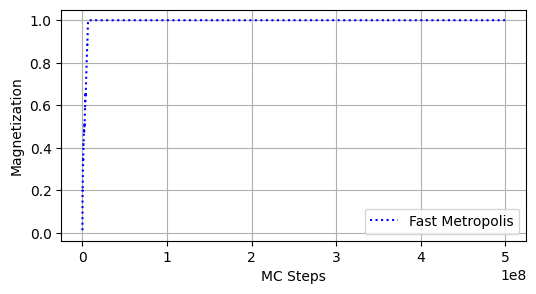

In [43]:
plt.figure(figsize=(6, 3))
plt.plot(np.arange(0, MC_steps*N*N, N*N), spins, 'b:', label='Fast Metropolis')
# plt.plot(spins_2, 'r--', label='Standard Metropolis')
plt.xlabel('MC Steps')
plt.ylabel('Magnetization')
plt.legend(loc='lower right')
plt.grid()

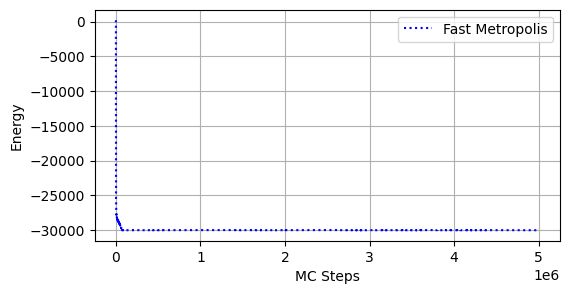

In [44]:
plt.figure(figsize=(6, 3))
plt.plot(energies[::100], 'b:', label='Fast Metropolis')
# plt.plot(energies_2[::100], 'r--', label='Standard Metropolis')
plt.xlabel('MC Steps')
plt.ylabel('Energy')
plt.legend(loc='upper right')
plt.grid()

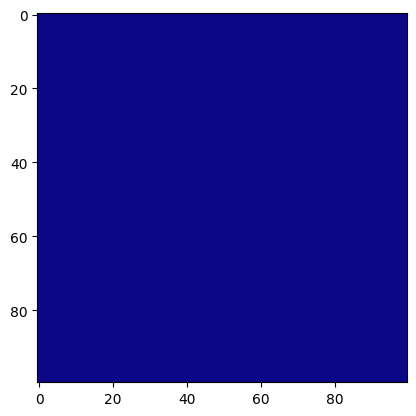

In [45]:
plt.imshow(last_config, cmap='plasma')

In [47]:

lattice_test = np.random.choice([-1, 1], size=(N, N), p=[p, 1-p])

energy = get_energy(lattice_test, N, J1, J2)
energy_test = get_energy_fast(lattice_test, N, J1, J2)

c:\Users\rbern\anaconda3\envs\ising_env\Lib\site-packages\numba\core\typed_passes.py:336: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "Ising_Model_Fast.py", line 72:
@njit(parallel=True)
def get_energy_fast(lattice, N, J1, J2):
^

  warnings.warn(errors.NumbaPerformanceWarning(msg,


In [54]:
time_get_energy = timeit.timeit(lambda: get_energy(lattice, N, J1, J2), number=MC_steps)
time_get_energy_fast = timeit.timeit(lambda: get_energy_fast(lattice, N, J1, J2), number=MC_steps)

print(f"Time taken by get_energy: {time_get_energy:.6f} seconds")
print(f"Time taken by get_energy_fast: {time_get_energy_fast:.6f} seconds")

Time taken by get_energy: 18.770826 seconds
Time taken by get_energy_fast: 5.939708 seconds
